In [4]:
import time
import glob
import torch
import os
import gdal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

import platform

PyTorch 1.7.0 _CudaDeviceProperties(name='Quadro K620', major=5, minor=0, total_memory=2048MB, multi_processor_count=3)


In [8]:
acacia = False
tiny = True

In [16]:
if platform.node() == 'GPPGIS06':
    print('GPPGIS06')
    source = r"C:\Development\dev_tools\tree-detector-yolo\data\img.tif" #  U:\T1F\Processed
#     source = r"U:\T2D\Output\T2D_30cm.tif"
    cfg = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\cfg\\yolov3-spp-1cls.cfg"
    weights = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\weights\\best_1cls_1500.pt"
    names = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\acacia.names"
   
    
    source_op = r'C:\Development\dev_tools\tree-detector-yolo\data\digitalglobe_oilpalm.tif' 
    # source_op = r"C:\Map\Deep_learning\digital_globe\011802594010_01\Processing\Keresa_Pansharped_765.tif"
#     source_op = r'C:\Map\Deep_learning\digital_globe\011802594020_01\Processing\tradewinds_pansharped_765.tif'
    if tiny:
        cfg_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3-tiny3-1cls.cfg"
        weights_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_op_tiny_200.pt"
        names_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names"
    else:
        cfg_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3_spp_1cls_op.cfg"
        weights_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_oilpalm_wv_500.pt"
        names_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names"
    
elif platform.node() == 'LWS-PC':
    print('LWS-PC')
    source= r'E:\GDrive\acacia_dataset\data\img.tif'
    cfg = "E:\\GDrive\\acacia_dataset\\cfg\\yolov3-spp-1cls.cfg"
    weights = "E:\\GDrive\\acacia_dataset\\weights\\last_1cls_1300.pt"
    names = "E:\\GDrive\\acacia_dataset\\acacia.names"
    
    source_op = r"E:\GDrive\satellite_dataset\worldview\data\Keresa_Pansharped_765_6.tif"
    cfg_op = r"E:\GDrive\satellite_dataset\worldview\cfg\yolov3_spp_1cls_op.cfg"
    weights_op = r"E:\GDrive\satellite_dataset\worldview\weights\best_oilpalm_wv_300.pt"
    names_op = r"E:\GDrive\satellite_dataset\worldview\op.names"

GPPGIS06


In [17]:
if acacia:
    outfilename=os.path.splitext(os.path.basename(source))[0]
    weight_nm = os.path.splitext(os.path.basename(weights))[0]
    fd_name = 'output_' + outfilename + '_' + weight_nm
    print('[INFO] output will be saved in',fd_name)
    !python detectv2.py --source="{source}" \
    --output=./"{fd_name}" \
    --cfg="{cfg}" \
    --weights="{weights}" \
    --names="{names}" \
    --conf-thres 0.1 \
    --iou-thres 0.4 \
    --agnostic-nms --augment --ratio --save-img
else:
    outfilename=os.path.splitext(os.path.basename(source_op))[0]
    weight_nm = os.path.splitext(os.path.basename(weights_op))[0]
    fd_name = 'output_' + outfilename + '_' + weight_nm
    print('[INFO] output will be saved in',fd_name)
    !python detectv2.py --source="{source_op}" \
    --output=./"{fd_name}" \
    --cfg="{cfg_op}" \
    --weights="{weights_op}" \
    --names="{names_op}" \
    --conf-thres 0.1 \
    --iou-thres 0.2 \
    --agnostic-nms --augment --save-img

[INFO] output will be saved in output_digitalglobe_oilpalm_best_op_tiny_200
Namespace(agnostic_nms=True, augment=True, cfg='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3-tiny3-1cls.cfg', classes=None, conf_thres=0.1, device='', half=False, img_size=416, iou_thres=0.2, names='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names', output='./output_digitalglobe_oilpalm_best_op_tiny_200', ratio=False, save_img=True, save_txt=False, source='C:\\Development\\dev_tools\\tree-detector-yolo\\data\\digitalglobe_oilpalm.tif', view_img=False, weights='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_op_tiny_200.pt')


Process geoms: 100%|##########| 29881/29881 [00:01<00:00, 21890.84it/s]



Using CUDA device0 _CudaDeviceProperties(name='Quadro K620', total_memory=2048MB)

Model Summary: 45 layers, 9.00039e+06 parameters, 9.00039e+06 gradients
Total object before NMS :  37811
Total object detected :  29881
Done. (168.247s)


In [ ]:
# !python detectv2.py --source="{source_op}" \
# --output=./output \
# --cfg="C:\Users\lerryw\Google Drive\satellite_dataset\worldview\cfg\yolov3-spp-1cls.cfg" \
# --weights="C:\Users\lerryw\Google Drive\satellite_dataset\worldview\weights\best_oilpalm_wv_100.pt" \
# --names="C:\Users\lerryw\Google Drive\satellite_dataset\worldview\op.names" \
# --conf-thres 0.1 \
# --iou-thres 0.2 \
# --agnostic-nms \
# --augment \
# --ratio \
# --save-img

In [69]:
# acacia = True
# if acacia:
#     !python detectv3.py --source="{source}" \
#     --output=./output \
#     --cfg="{cfg}" \
#     --weights="{weights}" \
#     --names="{names}" \
#     --conf-thres 0.2 \
#     --iou-thres 0.3
# else:
#     !python detectv3.py --source="{source_op}" \
#     --output=./output2 \
#     --cfg="{cfg_op}" \
#     --weights="{weights_op}" \
#     --names="{names_op}" \
#     --conf-thres 0.2 \
#     --iou-thres 0.6

In [ ]:
acacia = False
if acacia:
    !python detectv2.py --source="{source}" \
    --output=./output \
    --cfg="{cfg}" \
    --weights="{weights}" \
    --names="{names}" \
    --conf-thres 0.2 \
    --iou-thres 0.4 \
    --agnostic-nms \
    --augment \
    --ratio
else:
    !python detectv2.py --source="{source_op}" \
    --output=./output2 \
    --cfg="{cfg_op}" \
    --weights="{weights_op}" \
    --names="{names_op}" \
    --conf-thres 0.1 \
    --iou-thres 0.2 \
    --agnostic-nms \
    --augment \
    --ratio \
    --save-img

# PLOT

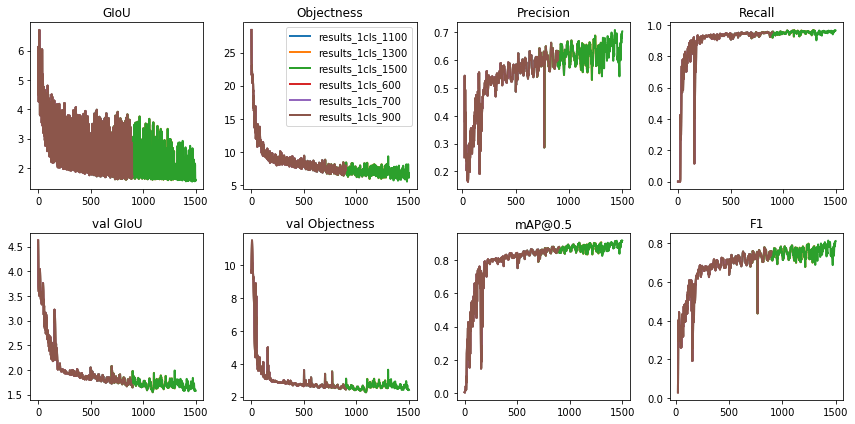

In [1]:
import glob
import math
import os
import random
import shutil
import subprocess
import time
from copy import copy
from pathlib import Path
from sys import platform

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm

file_path = r'C:\Users\lerryw\Google Drive\acacia_dataset\results_1cls_*.txt'

def plots(start=0, stop=0, id=()):  # from utils.utils import *; plot_results()
    # Plot training 'results*.txt' as seen in https://github.com/ultralytics/yolov3#training
    fig, ax = plt.subplots(2, 4, figsize=(12, 6), tight_layout=True)
    ax = ax.ravel()
    # s = ['GIoU', 'Objectness', 'Classification', 'Precision', 'Recall',
    #      'val GIoU', 'val Objectness', 'val Classification', 'mAP@0.5', 'F1']
    s = ['GIoU', 'Objectness', 'Precision', 'Recall',
         'val GIoU', 'val Objectness', 'mAP@0.5', 'F1']
    files = glob.glob(file_path)
    for f in sorted(files):
        try:
            # results = np.loadtxt(f, usecols=[2, 3, 4, 8, 9, 12, 13, 14, 10, 11], ndmin=2).T
            results = np.loadtxt(f, usecols=[2, 3, 8, 9, 12, 13, 10, 11], ndmin=2).T
            n = results.shape[1]  # number of rows
            x = range(start, min(stop, n) if stop else n)
            for i in range(8):
                y = results[i, x]
                if i in [0, 1, 2, 5, 6, 7]:
                    y[y == 0] = np.nan  # dont show zero loss values
                    # y /= y[0]  # normalize
                ax[i].plot(x, y, marker='', label=Path(f).stem, linewidth=2, markersize=8)
                ax[i].set_title(s[i])
                # if i in [5, 6, 7]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except:
            print('Warning: Plotting error for %s, skipping file' % f)

    ax[1].legend()
    # fig.savefig('/content/acacia/training_results.png', dpi=360)

plots()